In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
import scipy.stats as stats

from sklearn.cross_validation import train_test_split
from sklearn import metrics


C:\Users\AM00431051\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
hr_data = pd.read_csv('D:\\Aishik Personal Data\\Data Sience\\Analytixlabs\\Python\\Class 15-16 Files\\Class 15-16 File\\Classification\\2. Case Study - HR Analytics\\HR_comma_sep.csv')

In [3]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [4]:
hr_data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
hr_data_num = hr_data._get_numeric_data()
hr_data_num.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


In [7]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.max(), x.min()],index = ['Count','NMISS','Max','Min'])

hr_data_num.apply(lambda x: var_summary(x)).T

,Count,NMISS,Max,Min
satisfaction_level,14999.0,0.0,1.0,0.09
last_evaluation,14999.0,0.0,1.0,0.36
number_project,14999.0,0.0,7.0,2.00
average_montly_hours,14999.0,0.0,310.0,96.00
time_spend_company,14999.0,0.0,10.0,2.00
Work_accident,14999.0,0.0,1.0,0.00
left,14999.0,0.0,1.0,0.00
promotion_last_5years,14999.0,0.0,1.0,0.00


In [8]:
def clippling(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    
hr_data_num.apply(lambda x : clippling(x))

satisfaction_level       None
last_evaluation          None
number_project           None
average_montly_hours     None
time_spend_company       None
Work_accident            None
left                     None
promotion_last_5years    None
dtype: object

In [9]:
hr_data_num

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0
5,0.41,0.50,2,153,3,0,1,0
6,0.10,0.77,6,247,4,0,1,0
7,0.92,0.85,5,259,5,0,1,0
8,0.89,1.00,5,224,5,0,1,0
9,0.42,0.53,2,142,3,0,1,0


## Exploratry Analysis

In [10]:
#independent t-test
df = pd.DataFrame()

for num_var in hr_data_num.columns:
    ttest = stats.ttest_ind(hr_data_num[hr_data_num['left'] == 0][num_var],hr_data_num[hr_data_num['left'] == 1][num_var])
    tempds = pd.DataFrame([num_var,ttest[0],ttest[1]]).T
    tempds.columns = ['Varibale', 'T value', 'P value']
    df = pd.concat([df, tempds], axis =0, ignore_index=True)
    
print(df)

                Varibale   T value      P value
0     satisfaction_level   51.6128            0
1        last_evaluation -0.804242      0.42127
2         number_project  -2.91386   0.00357521
3   average_montly_hours  -8.75225   2.3113e-18
4     time_spend_company  -17.9242  4.20768e-71
5          Work_accident   19.1658  6.61305e-81
6                   left      -inf            0
7  promotion_last_5years    7.5812  3.62405e-14


C:\Users\AM00431051\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


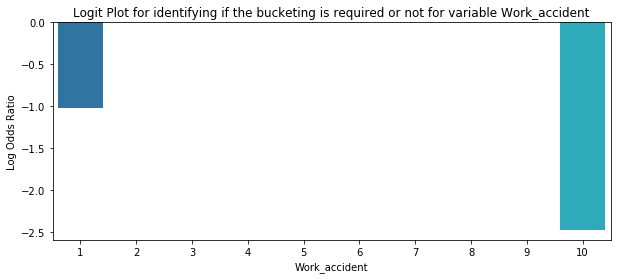

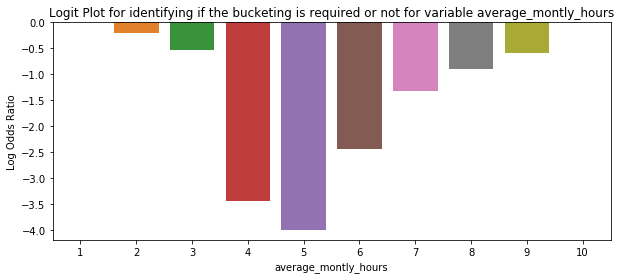

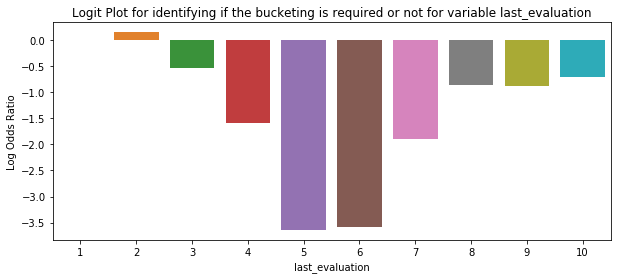

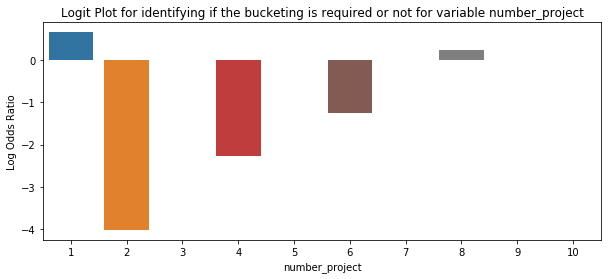

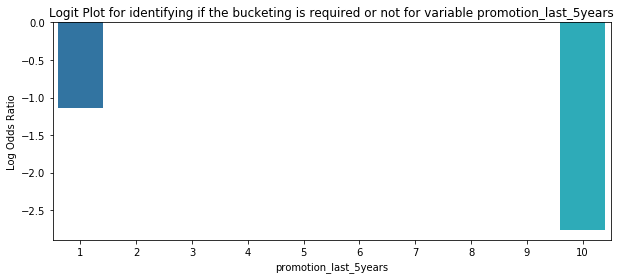

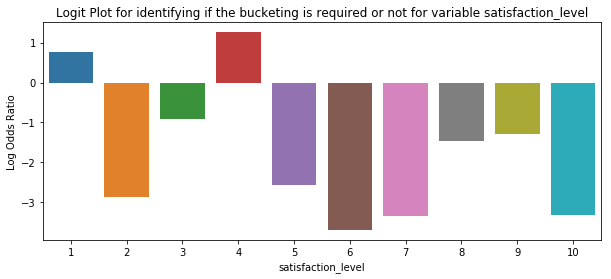

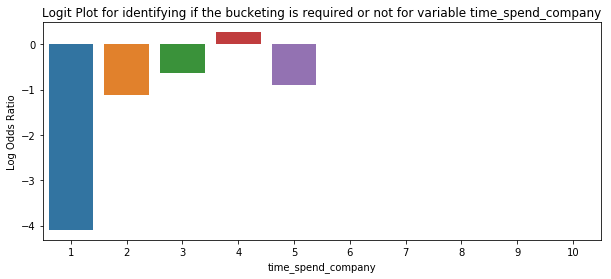

In [11]:
for num_var in hr_data_num.columns.difference(['left']):
    binned = pd.cut(hr_data_num[num_var],bins=10, labels=list(range(1,11)))
    ser = hr_data_num.groupby(binned)['left'].sum()/(hr_data_num.groupby(binned)['left'].count() - hr_data_num.groupby(binned)['left'].sum())
    ser = np.log(ser)
    fig,axes = plt.subplots(figsize=(10,4))
    sns.barplot(x=ser.index,y=ser)
    plt.ylabel('Log Odds Ratio')
    plt.title(str('Logit Plot for identifying if the bucketing is required or not for variable ') + str(num_var))
    

In [12]:
#Somer`s D

somersD_df = pd.DataFrame()
for num_var in hr_data_num.columns.difference(['left']):
    logreg = sm.logit(formula= str("left~")+str(num_var), data=hr_data_num)
    result = logreg.fit()
    y_score = pd.DataFrame(result.predict())
    somers_d = 2*metrics.roc_auc_score(hr_data_num['left'], y_score) -1
    temp = pd.DataFrame([num_var, somers_d]).T
    temp.columns = ['variable','Somer`s D']
    somersD_df = pd.concat([somersD_df,temp])

somersD_df

Optimization terminated successfully.
         Current function value: 0.534317
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.546317
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548838
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.548578
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.546364
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.473291
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.539150
         Iterations 5


,variable,Somer`s D
0,Work_accident,0.127683
0,average_montly_hours,0.0629712
0,last_evaluation,-0.00330772
0,number_project,-0.0257533
0,promotion_last_5years,0.0209307
0,satisfaction_level,0.495877
0,time_spend_company,0.346659


In [13]:
#vif
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
cols = '+'.join(hr_data_num.columns.difference(['left']))
x,y = dmatrices(formula_like="left ~ "+cols, data = hr_data_num, return_type= "dataframe")

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(y.values,i) for i in range(y.shape[1])]
vif["features"] = y.columns

vif

,VIF,features
0,35.759264,Intercept
1,1.005260,Work_accident
2,1.278963,average_montly_hours
3,1.240498,last_evaluation
4,1.352436,number_project
5,1.007586,promotion_last_5years
6,1.063412,satisfaction_level
7,1.060520,time_spend_company


In [131]:
hr_data_cat = hr_data.loc[:, pd.Series(hr_data.columns.difference(hr_data_num.columns))]
hr_data_cat.columns

Index(['department', 'salary'], dtype='object')

In [122]:
def DummyCreation(df, colname):
    col_dummies = pd.get_dummies(df[colname],prefix=colname)
    col_dummies.drop(col_dummies.columns[0],axis =1,inplace= True)
    df = pd.concat([df,col_dummies], axis=1)
    df.drop(colname,axis=1,inplace=True)
    return df


In [132]:
for cat_var in ['department', 'salary']:
    hr_data_cat[cat_var] = hr_data_cat[cat_var].astype('category')
    hr_data_cat = DummyCreation(hr_data_cat,cat_var)



In [135]:
hr_data_final = pd.concat([hr_data_num,hr_data_cat], axis=1)

In [136]:
train,test = train_test_split(hr_data_final,test_size=0.3,random_state =42)

In [137]:
train.shape
test.shape

(4500, 19)

In [138]:
cols = '+'.join(hr_data_final.columns.difference(['left']))

In [139]:
log_reg = sm.logit(formula="left ~ "+cols, data=train)
result = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.425451
         Iterations 7


In [140]:
train['pred'] = result.predict()

C:\Users\AM00431051\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [141]:
metrics.roc_auc_score(train['left'], result.predict())

0.8236447078831532

In [142]:
metrics.roc_auc_score(test['left'],result.predict(test))

0.8151014907957297

In [143]:
train_gini = 2*metrics.roc_auc_score(train['left'],result.predict())-1
print("Train Gini :: ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['left'],result.predict(test))-1
print("Test Gini :: ", test_gini)

Train Gini ::  0.6472894157663065
Test Gini ::  0.6302029815914594


In [144]:
train_prob = pd.DataFrame(result.predict(train))
train_actual = train['left']

train_afterReg = pd.concat([train_actual,train_prob],axis = 1)
train_afterReg.columns = ['actual','prob']


In [145]:
test_prob = pd.DataFrame(result.predict(test))
test_actual = test['left']

test_afterReg = pd.concat([test_actual,test_prob],axis = 1)
test_afterReg.columns = ['actual','prob']


In [146]:
roc_df = pd.DataFrame()
train_temp = train_afterReg.copy()
train_temp['actual'] = train_temp['actual'].astype(float)

for cut_off in np.linspace(0,1,50):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1.0 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1.0 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0.0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0.0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum()/(train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum()/(train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_temp = pd.DataFrame([cut_off,specificity, sensitivity]).T
    roc_temp.columns = ['cut_off','specificity', 'sensitivity']
    roc_df = pd.concat([roc_df,roc_temp],axis =0, ignore_index=True)

roc_df

,cut_off,specificity,sensitivity
0,0.000000,0.000000,1.000000
1,0.020408,0.084125,0.997999
2,0.040816,0.180625,0.987995
3,0.061224,0.277250,0.977991
4,0.081633,0.366875,0.971989
5,0.102041,0.444500,0.957183
6,0.122449,0.501250,0.933173
7,0.142857,0.559375,0.897559
8,0.163265,0.610125,0.860344
9,0.183673,0.648625,0.825930


In [147]:
train_temp.dtypes

actual       float64
prob         float64
cut_off      float64
predicted    float64
tp           float64
fp           float64
tn           float64
fn           float64
dtype: object

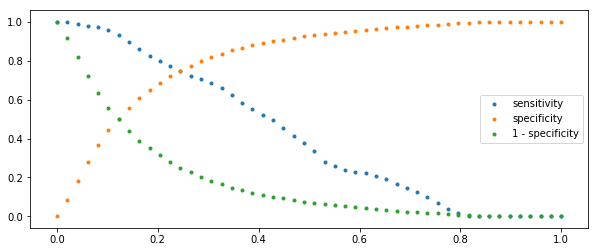

In [148]:
plt.subplots(figsize=(10,4))
plt.scatter(roc_df['cut_off'], roc_df['sensitivity'], marker='.', label = 'sensitivity')
plt.scatter(roc_df['cut_off'], roc_df['specificity'], marker='.', label = 'specificity')
plt.scatter(roc_df['cut_off'], 1-roc_df['specificity'], marker='.', label = '1 - specificity')
plt.legend()

In [149]:
roc_df['total'] = roc_df['sensitivity'] + roc_df['specificity']
roc_df[roc_df['total']==roc_df['total'].max()]

,cut_off,specificity,sensitivity,total
14,0.285714,0.797625,0.706683,1.504308


In [150]:
train_afterReg['pred'] = train_afterReg['prob'].apply(lambda x: 1 if x >= 0.326 else 0)
test_afterReg['pred'] = test_afterReg['prob'].apply(lambda x: 1 if x >= 0.326 else 0)
test_afterReg

,actual,prob,pred
6723,0,0.029295,0
6473,0,0.076556,0
4679,0,0.232740,0
862,1,0.484593,1
7286,0,0.023908,0
8127,0,0.277171,0
3017,0,0.014117,0
3087,0,0.875774,1
6425,0,0.238300,0
2250,0,0.607693,1


In [151]:
print(metrics.accuracy_score(train_afterReg.actual, train_afterReg.pred))
print(metrics.accuracy_score(test_afterReg.actual, test_afterReg.pred))

0.7925516715877703
0.788
